# Office for National Statistics (ONS)
## Mortality Analysis Training Package  
**Unit:** Key Concepts – Mortality Rates in Python  
**Date:** August 2025  

---

### Overview  
This script is part of the ONS mortality analysis training package.  
It supports the "Key Concepts" unit and demonstrates how to calculate  
a range of mortality rates using Python. These methods are used in official  
statistics and public health reporting, and align with ONS guidance.

### Purpose  
To provide practical examples of calculating mortality rates using synthetic data.

### Rates Covered  
1. Crude Mortality Rate  
Additions: Crude Mortlity Rate by sex
2. Age-Specific Mortality Rate  
Addtional: Age-Specific Mortality Rate by Region (England Only)
3. Age-Standardised Mortality Rate (ASMR)  
4. Infant Mortality Rate  
5. Perinatal Mortality Rate  
6. Years of Life Lost (YLL)  
7. Years of Working Life Lost (YWLL)  
8. Mean Age at Death  
Additional: Additional: Mean Age at Death by Region
9. Crude Rate of YLL  
10. Potential Years of Life Lost (PYLL) and Standardised PYLL (SYLL)  
Additional - Registration Delays  
Additional - Registration Delays by certification type  

### Unit: Life Expectancy Methods & Modelling Expected Deaths and Excess Mortality  
Modelling Expected Deaths and Excess Mortality   
Life Expectancy Calculation Using Life Table Methods  



### Learning Outcomes  
- Understand key mortality concepts and terminology  
- Apply standard methods to calculate mortality rates  
- Interpret and present mortality statistics responsibly

### Data Requirements  
The following files are provided with this training unit:

- `synthetic_death_registration_dataset.csv`  
  > Contains 153,198 synthetic death records for England and Wales, including neonatal deaths

- `synthetic_death_registration_data_dictionary.xlsx`  
  > Describes all variables in the synthetic death registration dataset
- `synthetic_birth_notifications_dataset.csv`  
  > Contains synthetic birth notification records for England and Wales
- `synthetic_birth_notifications_dictionary.csv`  
  > Describes all variables in the synthetic birth notifications dataset

- `mid_year_population_estimates.csv`  
  > Contains mid-year population estimates for:
    - England and Wales
    - England
    - Wales
    - Regions

- `european_standard_population.csv`  
  > Provides standard population weights for age-standardised mortality rate (ASMR) calculations

### Required Packages  
- `pandas` (for data manipulation)  
- `numpy` (for numerical operations)   
- `openpyxl` (for reading Excel files)


---

##  Setup: Environment and Package Loading  
Prepares the environment for the mortality analysis training unit  
Installs and imports required packages and sets up the working directory

This section prepares the environment for the **mortality analysis training unit**.  
It installs and imports the required packages for data handling and analysis, and sets up the working directory for loading data files.

**Notes:**
- If the script is run from the root of the mortality training folder, file paths will resolve automatically  
- Data files are expected to be stored in a subfolder named `Data`  
- If packages are missing, they will be installed automatically

---


In [1]:
# Install and import required packages
try:
    import os
    import pandas as pd
    import numpy as np
    import importlib.util
    import matplotlib.pyplot as plt
    import statsmodels.api as sm
    from pandas.api.types import CategoricalDtype
    from IPython.display import display, HTML
except ImportError:
    !pip install pandas numpy matplotlib statsmodels openpyxl ipython
    import os
    import pandas as pd
    import numpy as np
    import importlib.util
    import matplotlib.pyplot as plt
    import statsmodels.api as sm
    from pandas.api.types import CategoricalDtype
    from IPython.display import display, HTML

# Set up base data folder
# Assumes the script is run from the root of the mortality training folder
data_folder = "Data"

# Helper function to build full path to a file
def data_path(filename):
    return os.path.join(data_folder, filename)

---

##  Load Data Files with Checks  
Loads all required datasets for the mortality analysis training unit  
Each file is checked before loading, with errors for essential files and warnings for optional ones

This section loads all required datasets for the **mortality analysis training unit**.  
Each file is checked before loading. Errors are raised for essential files, and warnings are printed for optional ones.

**Notes:**
- `low_memory=False` helps pandas handle mixed-type columns more reliably  
- `openpyxl` is required for reading Excel files (`.xlsx`)

---


In [2]:
# Check if openpyxl is available
openpyxl_available = importlib.util.find_spec("openpyxl") is not None

# Define base data folder (adjust if needed)
data_folder = "../Data"

# Helper function to build full path
def data_path(filename):
    return os.path.join(data_folder, filename)

# Load synthetic death registration dataset
death_file = data_path("synthetic_death_registration_dataset.csv")
if not os.path.exists(death_file):
    raise FileNotFoundError("Death registration dataset not found. Please check your file path.")
deaths = pd.read_csv(death_file, low_memory=False)

# Load mid-year population estimates
pop_file = data_path("mid_year_population_estimates.csv")
if not os.path.exists(pop_file):
    raise FileNotFoundError("Population estimates file not found.")
population_estimates = pd.read_csv(pop_file)

# Load European Standard Population weights
esp_file = data_path("european_standard_population.csv")
if not os.path.exists(esp_file):
    raise FileNotFoundError("European Standard Population file not found.")
esp_weights = pd.read_csv(esp_file)

# Load synthetic death registration data dictionary (optional)
death_dict_file = data_path("synthetic_death_registration_data_dictionary.xlsx")
if os.path.exists(death_dict_file):
    if openpyxl_available:
        death_dictionary = pd.read_excel(death_dict_file, engine="openpyxl")
    else:
        print("Warning: 'openpyxl' is not installed. Cannot load Excel file.")
else:
    print("Warning: Death registration data dictionary not found.")

# Load synthetic birth notifications data dictionary (optional)
birth_dict_file = data_path("synthetic_birth_notifications_dictionary.csv")
if os.path.exists(birth_dict_file):
    birth_dictionary = pd.read_csv(birth_dict_file)
else:
    print("Warning: Birth notifications data dictionary not found.")

# Load synthetic birth notifications dataset
birth_file = data_path("synthetic_birth_notifications_dataset.csv")
if not os.path.exists(birth_file):
    raise FileNotFoundError("Birth notifications dataset not found. Please check your file path.")
births = pd.read_csv(birth_file, low_memory=False)


---

##  Preview Data (Optional for Learners)  
Displays the first few rows of each dataset  
Helps learners understand the structure and contents of the data

This section previews the first few rows of each dataset.  
It helps learners understand the structure, variable names, and typical values in the synthetic mortality data.

---


In [3]:
# Function to display a scrollable preview
def scrollable_preview(df, title, max_rows=10, max_cols=20):
    html = f"""
    <h3>{title}</h3>
    <div style="overflow:auto; max-height:300px; border:1px solid #ccc; padding:10px;">
        {df.head(max_rows).to_html(max_cols=max_cols, escape=False)}
    </div>
    """
    display(HTML(html))

# Preview each dataset
scrollable_preview(deaths, "Death Registration Dataset")
scrollable_preview(population_estimates, "Mid-Year Population Estimates")
scrollable_preview(esp_weights, "European Standard Population Weights")

# Optional: preview death registration data dictionary
if 'death_dictionary' in globals():
    scrollable_preview(death_dictionary, "Death Registration Data Dictionary")
else:
    print("Death registration data dictionary not loaded.\n")

# Optional: preview birth notifications data dictionary
if 'birth_dictionary' in globals():
    scrollable_preview(birth_dictionary, "Birth Notifications Data Dictionary")
else:
    print("Birth notifications data dictionary not loaded.\n")

# Preview birth notifications dataset
scrollable_preview(births, "Birth Notifications Dataset")


## Each rate calculation will be structured in its own section

### Example:

---

## 1. Example Rate


---
## 1. Crude Mortality Rate


This section calculates the **Crude Mortality Rate** using synthetic data.  
The rate represents the number of deaths **per 100,000 population**.

---

In [4]:
# Step 1: Count the total number of deaths
# Each row in the 'deaths' dataset represents one registered death
total_deaths = len(deaths)

# Step 2: Sum the total population for England and Wales
# Filter 'population_estimates' where Areatype is "E&W"
# Then sum the 'Popn' column to get the total population
total_population = (
    population_estimates[population_estimates["Areatype"] == "E&W"]["Popn"]
    .sum(skipna=True)
)

# Step 3: Calculate the Crude Mortality Rate
# Formula: (Total Deaths / Total Population) * 100,000
crude_mortality_rate = (total_deaths / total_population) * 100000

# Step 4: Display the result
# Round to 2 decimal places for readability
print("Crude Mortality Rate (per 100,000 population):", round(crude_mortality_rate, 2))


Crude Mortality Rate (per 100,000 population): 247.87


---
## Additional: Crude Mortality Rate by Sex


This section calculates the **Crude Mortality Rate by Sex** using synthetic mortality and population data.  
It measures the number of deaths **per 100,000 population**, broken down by sex:

- **1 = Male**  
- **2 = Female**
---

In [5]:
# Step 1: Count total deaths by sex
# The 'deaths' dataset uses 'SEX' to indicate sex
# 1 male
# 2 female
deaths_by_sex = deaths.groupby('SEX').size().reset_index(name='total_deaths')

# Step 2: Sum population by sex for England and Wales
# The 'population_estimates' dataset uses 'Sex' and 'Areatype'
population_by_sex = (
    population_estimates[population_estimates['Areatype'] == 'E&W']
    .groupby('Sex')['Popn']
    .sum()
    .reset_index(name='total_population')
)

# Step 3: Join deaths and population data by sex
# We match 'SEX' from deaths with 'Sex' from population estimates
crude_rate_by_sex = deaths_by_sex.merge(population_by_sex, left_on='SEX', right_on='Sex', how='left')
crude_rate_by_sex['crude_rate'] = (crude_rate_by_sex['total_deaths'] / crude_rate_by_sex['total_population']) * 100000

# Step 4: Display results
# Round the crude rate to 2 decimal places for readability
crude_rate_by_sex['crude_rate'] = crude_rate_by_sex['crude_rate'].round(2)

# Step 4: Display the result using print()
# We loop through each row and print the sex-specific crude mortality rate
for _, row in crude_rate_by_sex.iterrows():
    print(f"Crude Mortality Rate for {row['SEX']} (per 100,000 population): {row['crude_rate']}")


Crude Mortality Rate for 1.0 (per 100,000 population): 254.39
Crude Mortality Rate for 2.0 (per 100,000 population): 241.6


---

## 2. Age-Specific Mortality Rate

This section calculates the **Age-Specific Mortality Rate (ASMR)** using synthetic mortality and population data.  
Rates are expressed per **100,000 population** within each age group.

---



In [6]:
# Step 1: Count total deaths by age group
# We group the 'deaths' dataset by Agegroup2 and count the number of records in each group.
# This gives us the total number of deaths per age group.
deaths_by_age = deaths.groupby('Agegroup2').size().reset_index(name='total_deaths')

# Step 2: Sum population by age group for England and Wales
# We filter the population estimates to include only England & Wales (Areatype == "E&W"),
# then group by Agegroup2 and sum the population within each group.
population_by_age = (
    population_estimates[population_estimates['Areatype'] == 'E&W']
    .groupby('Agegroup2')['Popn']
    .sum()
    .reset_index(name='total_population')
)

# Step 3: Join deaths and population data by age group
# We perform a left join to combine the deaths and population datasets by Agegroup2.
# This ensures all age groups from the deaths data are retained, even if population data is missing.
# We then calculate the Age-Specific Mortality Rate (ASMR) per 100,000 population.
age_specific_rates = deaths_by_age.merge(population_by_age, on='Agegroup2', how='left')
age_specific_rates['ASMR'] = (age_specific_rates['total_deaths'] / age_specific_rates['total_population']) * 100000

# Step 4: Display results in a readable format
# We round the ASMR to two decimal places for clarity.
# Then, for each age group, we create a formatted string describing the ASMR.
# Finally, we print each line using print(), which outputs to the console.
age_specific_rates['ASMR'] = age_specific_rates['ASMR'].round(2)

for _, row in age_specific_rates.iterrows():
    print(f"Age-Specific Mortality Rate for {row['Agegroup2']} (per 100,000): {row['ASMR']}")


Age-Specific Mortality Rate for 01-04 (per 100,000): 7.33
Age-Specific Mortality Rate for 05-09 (per 100,000): 4.48
Age-Specific Mortality Rate for 10-14 (per 100,000): 5.09
Age-Specific Mortality Rate for 15-19 (per 100,000): 14.77
Age-Specific Mortality Rate for 20-24 (per 100,000): 20.81
Age-Specific Mortality Rate for 25-29 (per 100,000): 24.45
Age-Specific Mortality Rate for 30-34 (per 100,000): 34.35
Age-Specific Mortality Rate for 35-39 (per 100,000): 54.1
Age-Specific Mortality Rate for 40-44 (per 100,000): 81.85
Age-Specific Mortality Rate for 45-49 (per 100,000): 122.35
Age-Specific Mortality Rate for 50-54 (per 100,000): 190.61
Age-Specific Mortality Rate for 55-59 (per 100,000): 279.06
Age-Specific Mortality Rate for 60-64 (per 100,000): 384.15
Age-Specific Mortality Rate for 65-69 (per 100,000): 369.02
Age-Specific Mortality Rate for 70-74 (per 100,000): 628.09
Age-Specific Mortality Rate for 75-79 (per 100,000): 554.65
Age-Specific Mortality Rate for 80-84 (per 100,000): 

---

## Additional: Age-Specific Mortality Rate by Region (England Only)

This section calculates **Age-Specific Mortality Rates** for each region in **England only**, using synthetic mortality and population data.  
Rates are expressed per **100,000 population** within each age group and region.

---


In [7]:
# Step 1: Filter deaths to England only and count by age group and region
# 'CTRYIR == 1' identifies records from England.
# 'RGN' is the region code, and 'Agegroup2' is the age group variable.
# We group by region and age group, then count the number of deaths in each group.
deaths_by_age_region = (
    deaths[deaths['CTRYIR'] == 1]
    .groupby(['RGN', 'Agegroup2'])
    .size()
    .reset_index(name='total_deaths')
)

# Step 2: Sum population by age group and region
# The population estimates dataset uses 'Code' for region codes and 'Agegroup2' for age groups.
# We filter to include only regional-level data (Areatype == "REG"),
# then group by region and age group and sum the population for each group.
population_by_age_region = (
    population_estimates[population_estimates['Areatype'] == 'REG']
    .groupby(['Code', 'Agegroup2'])['Popn']
    .sum()
    .reset_index(name='total_population')
)

# Step 3: Join deaths and population data by region and age group
# We join the two datasets using region code and age group as keys.
# This aligns death counts with corresponding population estimates.
# We then calculate the Age-Specific Mortality Rate (ASMR) per 100,000 population.
age_specific_rates_region = deaths_by_age_region.merge(
    population_by_age_region,
    left_on=['RGN', 'Agegroup2'],
    right_on=['Code', 'Agegroup2'],
    how='left'
)
age_specific_rates_region['ASMR'] = (
    age_specific_rates_region['total_deaths'] / age_specific_rates_region['total_population']
) * 100000

# Step 4: Display results in a readable format
# We round the ASMR to two decimal places for clarity.
# For each region and age group, we create a formatted output string.
# Finally, we print each line using print(), which outputs to the console.
age_specific_rates_region['ASMR'] = age_specific_rates_region['ASMR'].round(2)

for _, row in age_specific_rates_region.iterrows():
    print(f"Region Code: {row['RGN']} | Age Group: {row['Agegroup2']} | ASMR (per 100,000): {row['ASMR']}")


Region Code: E12000001 | Age Group: 01-04 | ASMR (per 100,000): 23.09
Region Code: E12000001 | Age Group: 05-09 | ASMR (per 100,000): 5.93
Region Code: E12000001 | Age Group: 10-14 | ASMR (per 100,000): 17.91
Region Code: E12000001 | Age Group: 15-19 | ASMR (per 100,000): 38.33
Region Code: E12000001 | Age Group: 20-24 | ASMR (per 100,000): 45.36
Region Code: E12000001 | Age Group: 25-29 | ASMR (per 100,000): 74.02
Region Code: E12000001 | Age Group: 30-34 | ASMR (per 100,000): 88.78
Region Code: E12000001 | Age Group: 35-39 | ASMR (per 100,000): 137.9
Region Code: E12000001 | Age Group: 40-44 | ASMR (per 100,000): 213.33
Region Code: E12000001 | Age Group: 45-49 | ASMR (per 100,000): 303.25
Region Code: E12000001 | Age Group: 50-54 | ASMR (per 100,000): 452.87
Region Code: E12000001 | Age Group: 55-59 | ASMR (per 100,000): 659.94
Region Code: E12000001 | Age Group: 60-64 | ASMR (per 100,000): 831.2
Region Code: E12000001 | Age Group: 65-69 | ASMR (per 100,000): 711.48
Region Code: E12

---

## 3. Age-Standardised Mortality Rate (ASMR)  
Using European Standard Population (ESP) weights  
Including confidence intervals

This section calculates **Age-Standardised Mortality Rates (ASMRs)** using the **European Standard Population (ESP)** as weights.  
It also includes **confidence intervals** to account for statistical uncertainty, typically calculated using the **Dobson method**.

---


In [8]:
# Step 0: Adjust ESP weights to match Agegroup2 format
# The ESP dataset uses "85-89" and "90+", but our mortality data uses "85+"
# To ensure consistency, we combine these two ESP groups into a single "85+" group
esp_weights_adjusted = (
    esp_weights.assign(Agegroup2=esp_weights['agegroup'].replace({'85-89': '85+', '90+': '85+'}))
    .groupby('Agegroup2', as_index=False)['esp']
    .sum()
)

# Step 1: Count total deaths by Agegroup2
# We group the deaths dataset by Agegroup2 and count the number of deaths in each group
deaths_by_age = deaths.groupby('Agegroup2').size().reset_index(name='total_deaths')

# Step 1a: Ensure all age groups are present, even if there are zero deaths
# This is essential for accurate ASMR calculation — missing age groups would distort the result
# We create a complete list of age groups from the ESP weights and join it with the deaths data
# Any missing age groups will have NA for total_deaths, which we replace with 0
all_agegroups = esp_weights_adjusted[['Agegroup2']].drop_duplicates()
deaths_by_age_complete = all_agegroups.merge(deaths_by_age, on='Agegroup2', how='left')
deaths_by_age_complete['total_deaths'] = deaths_by_age_complete['total_deaths'].fillna(0)

# Step 2: Sum population by Agegroup2 for England and Wales
# We filter the population estimates to include only national-level data (Areatype == "E&W")
# Then we group by Agegroup2 and sum the population for each group
population_by_age = (
    population_estimates[population_estimates['Areatype'] == 'E&W']
    .groupby('Agegroup2', as_index=False)['Popn']
    .sum()
    .rename(columns={'Popn': 'total_population'})
)

# Step 3: Join deaths and population data to calculate age-specific mortality rates
# We calculate the mortality rate per 100,000 population for each age group
age_specific_rates = deaths_by_age_complete.merge(population_by_age, on='Agegroup2', how='left')
age_specific_rates['rate'] = (age_specific_rates['total_deaths'] / age_specific_rates['total_population']) * 100000

# Step 4: Join with adjusted ESP weights
# This applies the standard population weights to each age-specific rate
# These weights allow us to standardise the rates across age groups
rates_with_weights = age_specific_rates.merge(esp_weights_adjusted, on='Agegroup2', how='left')
rates_with_weights['weighted_rate'] = rates_with_weights['rate'] * rates_with_weights['esp']

# Step 5: Calculate the ASMR
# We sum the weighted rates and divide by the total ESP to get the standardised rate
asmr = rates_with_weights['weighted_rate'].sum(skipna=True) / rates_with_weights['esp'].sum(skipna=True)

# Step 6: Calculate ASMR confidence intervals using the Dobson method
# This method estimates the variance of the ASMR using the formula:
# Var(ASMR) = sum((w_i^2 * d_i) / p_i^2), where:
# - w_i = ESP weight for age group i
# - d_i = number of deaths in age group i
# - p_i = population in age group i
rates_with_weights['variance_component'] = (
    (rates_with_weights['esp'] ** 2 * rates_with_weights['total_deaths']) /
    (rates_with_weights['total_population'] ** 2)
)

# Sum variance components to get total variance
asmr_variance = rates_with_weights['variance_component'].sum(skipna=True)

# Calculate standard error and 95% confidence interval
asmr_se = asmr_variance ** 0.5
asmr_lower = asmr - 1.96 * asmr_se
asmr_upper = asmr + 1.96 * asmr_se

# Step 7: Display results
# We round the ASMR and confidence interval to two decimal places for reporting
print("Age-Standardised Mortality Rate (ASMR) for England and Wales (per 100,000):", round(asmr, 2))
print("95% Confidence Interval (Dobson method):", round(asmr_lower, 2), "to", round(asmr_upper, 2))


Age-Standardised Mortality Rate (ASMR) for England and Wales (per 100,000): 251.15
95% Confidence Interval (Dobson method): 249.89 to 252.41


---

## 4. Infant Mortality Rate (IMR)  
Calculated as deaths under age 1 per 1,000 live births

This section calculates the **Infant Mortality Rate (IMR)** using synthetic data.  
IMR is defined as the number of deaths of infants under age 1 per **1,000 live births**.

---


In [9]:
# Step 1: Filter deaths under age 1
# We use AGEINYRS to identify infant deaths in the deaths dataset
infant_deaths = deaths[deaths['AGEINYRS'] < 1]

# Step 2: Count total infant deaths
# This gives the numerator for the IMR calculation
total_infant_deaths = len(infant_deaths)

# Step 3: Count total live births
# We assume each record in the births dataset represents a live birth
# This gives the denominator for the IMR calculation
total_live_births = len(births)

# Step 4: Calculate Infant Mortality Rate (IMR)
# IMR = (Infant deaths / Live births) × 1,000
imr = (total_infant_deaths / total_live_births) * 1000

# Step 5: Display result
# We round the IMR to two decimal places for reporting
print("Infant Mortality Rate (IMR) for England and Wales (per 1,000 live births):", round(imr, 2))


Infant Mortality Rate (IMR) for England and Wales (per 1,000 live births): 4.12


---

## 5. Perinatal Mortality Rate (PMR)  
Calculated as stillbirths + deaths under 7 days per 1,000 total births

This section calculates the **Perinatal Mortality Rate (PMR)** using synthetic data.  
PMR is defined as the number of **stillbirths plus deaths under 7 days** per **1,000 total births**.

---


In [10]:
# Step 1: Identify deaths of liveborn infants under 7 days
# We use AGECUNIT == 4 (age in days) and AGEC < 7 to capture deaths
# that occurred before the infant reached 7 full days of life.
# This is the most accurate method for identifying perinatal deaths.
perinatal_deaths = deaths[(deaths['AGECUNIT'] == 4) & (deaths['AGEC'] < 7)]

# Step 2: Count deaths under 7 days
# These are the early neonatal deaths included in the PMR calculation
total_perinatal_deaths = len(perinatal_deaths)

# Step 3: Identify and count stillbirths
# SBINDZ == 1 indicates a stillbirth; SBINDZ is NULL for live births
stillbirths = births[births['SBIND'] == 1]
total_stillbirths = len(stillbirths)

# Step 4: Count total births (live births + stillbirths)
# All records in the births dataset are either stillbirths or live births
total_births = len(births)

# Step 5: Calculate Perinatal Mortality Rate (PMR)
# PMR = ((stillbirths + deaths under 7 days) / total births) × 1,000
pmr = ((total_stillbirths + total_perinatal_deaths) / total_births) * 1000

# Step 6: Display the PMR result
print("Perinatal Mortality Rate (PMR) for England and Wales (per 1,000 total births):", round(pmr, 2))


Perinatal Mortality Rate (PMR) for England and Wales (per 1,000 total births): 6.65


---

## 6. Years of Life Lost (YLL) due to Accidents  
Based on ICD-10 codes V01–X59 and ages 1–74

This section calculates **Years of Life Lost (YLL)** due to **accidental causes**, using synthetic mortality data.  
It includes deaths with ICD-10 codes **V01–X59** and considers ages **1 to 74**, reflecting premature mortality.

---


In [11]:
# Step 1: Define the ICD-10 codes that represent accidental deaths
# These codes cover unintentional injuries and are grouped as follows:
# - V01–V99: Transport accidents (e.g. pedestrian, cyclist, car, bus, water, air)
# - W00–W99: Other external causes (e.g. falls, mechanical forces, suffocation)
# - X00–X59: Environmental exposures and poisoning (e.g. fire, heat, drowning, poisoning)

accident_codes = (
    [f"V{str(i).zfill(2)}" for i in range(1, 100)] +
    [f"W{str(i).zfill(2)}" for i in range(0, 100)] +
    [f"X{str(i).zfill(2)}" for i in range(0, 60)]
)

# Step 2: Filter the deaths dataset to include only:
# - Deaths where age at death is between 1 and 74 (inclusive of 1, exclusive of 75)
# - Deaths where the underlying cause (FIC10UND) matches one of the accident codes
#   We match only the first 3 characters of the ICD-10 code to account for decimal-point codes (e.g. W85.3)
accident_deaths = deaths[
    (deaths['AGEINYRS'] >= 1) & (deaths['AGEINYRS'] < 75) &
    (deaths['FIC10UND'].str[:3].isin(accident_codes))
]

# Step 3: Calculate Years of Life Lost (YLL) for each death
# YLL is calculated as the difference between the threshold age (75)
# and the midpoint of the age group (age + 0.5)
accident_deaths = accident_deaths.copy()
accident_deaths['yll'] = 75 - (accident_deaths['AGEINYRS'] + 0.5)

# Step 4: Summarise the results
# We calculate:
# - Total YLL across all accident deaths
# - Average YLL per accident death
# - Total number of accident deaths included in the analysis
total_accident_yll = accident_deaths['yll'].sum(skipna=True)
average_accident_yll = accident_deaths['yll'].mean(skipna=True)
n_accident_deaths = len(accident_deaths)

# Step 5: Display the results
print("Number of deaths due to accidents (ages 1–74):", n_accident_deaths)
print("Total Years of Life Lost (YLL) due to accidents:", round(total_accident_yll, 1), "years")
print("Average YLL per accident death:", round(average_accident_yll, 1), "years")


Number of deaths due to accidents (ages 1–74): 670
Total Years of Life Lost (YLL) due to accidents: 11203.0 years
Average YLL per accident death: 16.7 years


---

## 7. Years of Working Life Lost (YWLL)  
Based on deaths registered in 2024 (REGYR)  
Using working-age definition from 2012 onwards: ages 16–64

This section calculates **Years of Working Life Lost (YWLL)** using synthetic mortality data.  
It includes deaths registered in **2024** and applies the **working-age definition** of **ages 16 to 64**, consistent with standards from **2012 onwards**.

---


In [12]:
# Step 1: Define the working-age range for YWLL calculations
# From the 2012 data year onwards, the working-age population is defined as ages 16 to 64.
# Deaths occurring within this age range are considered premature in terms of economic and social impact.
# The upper age limit for YWLL is fixed at 65 years, representing the notional retirement age.
# Deaths at age 65 or older are excluded from this analysis.

# Step 2: Filter the deaths dataset to include only:
# - Deaths registered in the year 2024 (REGYR == 2024)
# - Deaths where age at death is between 16 and 64 (inclusive of 16, exclusive of 65)
# This ensures that only deaths within the defined working-age range are included.
working_age_deaths = deaths[
    (deaths['REGYR'] == 2024) &
    (deaths['AGEINYRS'] >= 16) &
    (deaths['AGEINYRS'] < 65)
]

# Step 3: Calculate Years of Working Life Lost (YWLL) for each death
# YWLL is calculated as the difference between the retirement age (65)
# and the midpoint of the age at death (age + 0.5).
# This midpoint adjustment assumes deaths are evenly distributed within each age year.
# For example, a death at age 30 contributes 34.5 YWLL (i.e. 65 - 30.5).
working_age_deaths = working_age_deaths.copy()
working_age_deaths['ywll'] = 65 - (working_age_deaths['AGEINYRS'] + 0.5)

# Step 4: Summarise the results
# We calculate:
# - Total YWLL across all deaths in the working-age range
# - Average YWLL per death (i.e. mean years lost per individual)
# - Total number of deaths included in the YWLL analysis
# These metrics provide insight into the burden of premature mortality on the workforce.
total_ywll = working_age_deaths['ywll'].sum(skipna=True)
average_ywll = working_age_deaths['ywll'].mean(skipna=True)
n_working_age_deaths = len(working_age_deaths)

# Step 5: Display the results
# These figures can be used to assess the economic and social impact of premature death
# among the working-age population in England and Wales.
print("Number of deaths in working age range (16–64):", n_working_age_deaths)
print("Total Years of Working Life Lost (YWLL):", round(total_ywll, 1), "years")
print("Average YWLL per death:", round(average_ywll, 1), "years")


Number of deaths in working age range (16–64): 47235
Total Years of Working Life Lost (YWLL): 566574.5 years
Average YWLL per death: 12.0 years


---

## 8. Mean Age at Death

This section calculates the **Mean Age at Death** using synthetic mortality data.  
It provides a summary measure of the average age at which deaths occur across the population.

---


In [13]:
# Step 1: Calculate the mean age at death
# We use AGEINYRS, which represents age in completed years
# The mean is calculated across all death records
mean_age = deaths['AGEINYRS'].mean(skipna=True)

# Step 2: Display result
# We round the mean age to one decimal place for reporting
print("Mean Age at Death for England and Wales:", round(mean_age, 1), "years")


Mean Age at Death for England and Wales: 72.6 years


---

## Additonal: Mean Age at Death by Region

This section calculates the **Mean Age at Death** for each region using synthetic mortality data.  
It provides insight into regional variations in average age at death across England and Wales.

---


In [14]:
# Step 1: Group deaths by region and calculate mean age
# We use AGEINYRS to calculate the average age at death for each region
mean_age_by_region = (
    deaths.groupby('RGNNM', as_index=False)['AGEINYRS']
    .mean()
    .rename(columns={'AGEINYRS': 'mean_age'})
)

# Round mean age to one decimal place
mean_age_by_region['mean_age'] = mean_age_by_region['mean_age'].round(1)

# Step 2: Display results
# This prints the mean age at death for each region
print(mean_age_by_region)


                      RGNNM  mean_age
0                      East      72.5
1             East Midlands      72.6
2                    London      72.8
3                North East      72.5
4                North West      72.4
5                South East      72.5
6                South West      72.8
7                     Wales      72.6
8             West Midlands      72.5
9  Yorkshire and The Humber      72.5


---

## 9. Crude Rate of Years of Life Lost (YLL) due to Accidents  
Based on ICD-10 codes V01–X59 and ages 1–74  
Expressed per 100,000 population

This section calculates the **Crude Rate of Years of Life Lost (YLL)** due to **accidental causes**, using synthetic mortality and population data.  
It includes deaths with ICD-10 codes **V01–X59**, considers ages **1 to 74**, and expresses the rate per **100,000 population**.

---


In [15]:
# Step 1: Define ICD-10 codes for accidental deaths
accident_codes = (
    [f"V{str(i).zfill(2)}" for i in range(1, 100)] +
    [f"W{str(i).zfill(2)}" for i in range(0, 100)] +
    [f"X{str(i).zfill(2)}" for i in range(0, 60)]
)

# Step 2: Filter deaths for ages 1–74 and matching accident codes
accident_deaths = deaths[
    (deaths['AGEINYRS'] >= 1) & (deaths['AGEINYRS'] < 75) &
    (deaths['FIC10UND'].str[:3].isin(accident_codes))
].copy()

# Step 3: Calculate YLL for each death
accident_deaths['yll'] = 75 - (accident_deaths['AGEINYRS'] + 0.5)

# Step 4: Calculate total YLL
total_yll = accident_deaths['yll'].sum(skipna=True)

# Step 5: Extract total mid-year population for England and Wales
mid_year_pop_2024 = (
    population_estimates[population_estimates['Areatype'] == 'E&W']['Popn']
    .sum(skipna=True)
)

# Step 6: Calculate crude YLL rate
crude_yll_rate = (total_yll / mid_year_pop_2024) * 100000

# Step 7: Display results
print("Total YLL due to accidents:", round(total_yll, 1))
print("Mid-year population for England and Wales:", int(mid_year_pop_2024))
print("Crude YLL rate per 100,000 population (2024):", round(crude_yll_rate, 1))



Total YLL due to accidents: 11203.0
Mid-year population for England and Wales: 61806682
Crude YLL rate per 100,000 population (2024): 18.1


---

## 10. Potential Years of Life Lost (PYLL) and Standardised PYLL (SYLL)  
PYLL measures premature mortality by weighting deaths at younger ages more heavily  
SYLL adjusts PYLL using the 2013 European Standard Population (ESP)  
Dataset includes deaths registered in 2024 only

This section calculates **Potential Years of Life Lost (PYLL)** and **Standardised PYLL (SYLL)** using synthetic mortality data.  
PYLL highlights premature mortality by giving greater weight to deaths at younger ages.  
SYLL standardises PYLL using the **2013 European Standard Population (ESP)** to allow comparisons across populations.  
Only deaths **registered in 2024** are included in this analysis.

---


In [16]:
# Step 1: Select deaths where age at death is below 75
pyll_deaths = deaths[deaths['AGEINYRS'] < 75].copy()

# Step 2: Calculate PYLL for each death
pyll_deaths['pyll'] = 75 - (pyll_deaths['AGEINYRS'] + 0.5)

# Step 3: Aggregate PYLL by Agegroup2
pyll_by_age = (
    pyll_deaths.groupby('Agegroup2', as_index=False)['pyll']
    .sum()
    .rename(columns={'pyll': 'total_pyll'})
)

# Step 4: Ensure all age groups are represented
all_agegroups = esp_weights_adjusted[['Agegroup2']].drop_duplicates()
pyll_by_age_complete = all_agegroups.merge(pyll_by_age, on='Agegroup2', how='left')
pyll_by_age_complete['total_pyll'] = pyll_by_age_complete['total_pyll'].fillna(0)

# Step 5: Join with mid-year population estimates
population_by_age = (
    population_estimates[population_estimates['Areatype'] == 'E&W']
    .groupby('Agegroup2', as_index=False)['Popn']
    .sum()
    .rename(columns={'Popn': 'total_population'})
)

pyll_rates = pyll_by_age_complete.merge(population_by_age, on='Agegroup2', how='left')
pyll_rates['pyll_rate'] = (pyll_rates['total_pyll'] / pyll_rates['total_population']) * 100000

# Step 6: Apply ESP weights to calculate weighted PYLL rates
pyll_rates = pyll_rates.merge(esp_weights_adjusted, on='Agegroup2', how='left')
pyll_rates['weighted_rate'] = pyll_rates['pyll_rate'] * pyll_rates['esp']

# Step 7: Calculate the Standardised PYLL (SYLL)
syll = pyll_rates['weighted_rate'].sum(skipna=True) / pyll_rates['esp'].sum(skipna=True)

# Step 8: Display the results
print("Total Potential Years of Life Lost (PYLL):", round(pyll_deaths['pyll'].sum(skipna=True), 1), "years")
print("Standardised PYLL rate (SYLL) per 100,000 population:", round(syll, 1))


Total Potential Years of Life Lost (PYLL): 1263604.0 years
Standardised PYLL rate (SYLL) per 100,000 population: 2112.7


---

## Additional: Registration Delays  
Registration delay measures the time between date of death and date of registration  
Summary statistics include median, lower quartile, and upper quartile  

This section calculates **registration delays** for deaths registered in 2024.  
Summary statistics include the **median**, **lower quartile**, and **upper quartile** across all records.  
This helps assess timeliness and variation in registration practices.

---


In [17]:
# Step 1: Ensure DOD and DOR are in datetime format
# Mortality data often stores dates as strings. To perform date arithmetic,
# we must convert these to datetime objects. If already in datetime format,
# we skip conversion to avoid corrupting valid data.
if not pd.api.types.is_datetime64_any_dtype(deaths['DOD']):
    deaths['DOD'] = pd.to_datetime(deaths['DOD'], errors='coerce')

if not pd.api.types.is_datetime64_any_dtype(deaths['DOR']):
    deaths['DOR'] = pd.to_datetime(deaths['DOR'], errors='coerce')

# Step 2: Calculate registration delay in days
# The delay is defined as the number of days between the date of death
# and the date the death was officially registered. This is a key metric
# in understanding administrative lag and identifying patterns (e.g. coroner referrals).
deaths['delay'] = (deaths['DOR'] - deaths['DOD']).dt.days

# Step 3: Filter out missing or invalid delay values
# Some records may have missing or malformed dates, resulting in NaN delays.
# We exclude these to ensure summary statistics are based only on valid data.
valid_delays = deaths['delay'].dropna()

# Step 4: Calculate and display summary statistics
# These statistics provide a snapshot of registration timeliness:
# - Median: the typical delay
# - Lower quartile: 25% of deaths were registered within this number of days
# - Upper quartile: 75% of deaths were registered within this number of days
if not valid_delays.empty:
    median_delay = np.nanmedian(valid_delays)
    lower_quantile = np.nanpercentile(valid_delays, 25)
    upper_quantile = np.nanpercentile(valid_delays, 75)

    print(f"Median registration delay: {round(median_delay, 1)} days")
    print(f"Lower quartile (25th percentile): {round(lower_quantile, 1)} days")
    print(f"Upper quartile (75th percentile): {round(upper_quantile, 1)} days")
else:
    print("No valid registration delay data available to calculate summary statistics.")


Median registration delay: 8.0 days
Lower quartile (25th percentile): 6.0 days
Upper quartile (75th percentile): 10.0 days


---

## Additional: Registration Delays by Certification Type  
Registration delay measures the time between date of death and date of registration  
Grouped by certification type (CERTTYPE)  

This section calculates **registration delays** grouped by **certification type (CERTTYPE)**.  
Summary statistics include the **median**, **lower quartile**, and **upper quartile** for each group.  

---


In [18]:
# Step 1: Ensure DOD and DOR are in datetime format
# Dates may be stored as strings. To perform date arithmetic,
# we convert them to datetime objects if needed.
if not pd.api.types.is_datetime64_any_dtype(deaths['DOD']):
    deaths['DOD'] = pd.to_datetime(deaths['DOD'], errors='coerce')

if not pd.api.types.is_datetime64_any_dtype(deaths['DOR']):
    deaths['DOR'] = pd.to_datetime(deaths['DOR'], errors='coerce')

# Step 2: Calculate registration delay in days
# Delay is defined as the number of days between registration and death.
# This metric is useful for identifying patterns in administrative processing.
deaths['delay'] = (deaths['DOR'] - deaths['DOD']).dt.days

# Step 3: Create a lookup table for CERTTYPE descriptions
# This maps numeric certification codes to human-readable descriptions.
certtype_lookup = pd.DataFrame({
    'CERTTYPE': range(1, 10),
    'Description': [
        "Certified by doctor, no post mortem",
        "Certified by doctor, post mortem",
        "Certified by coroner, inquest and post mortem",
        "Certified by coroner, inquest no post mortem",
        "Certified by coroner, no inquest, post mortem",
        "Uncertified",
        "PM info not known on Doctor’s Medical Certificate (new values)",
        "PM info not known on Coroner’s inquest (new values)",
        "Not known (unable to derive)"
    ]
})

# Step 4: Filter to deaths registered in 2024
# This ensures the analysis is limited to a single registration year.
deaths_2024 = deaths[deaths['DOR'].dt.year == 2024]

# Step 5: Calculate summary statistics grouped by CERTTYPE
# For each certification type, we compute:
# - Median delay
# - Lower quartile (25th percentile)
# - Upper quartile (75th percentile)
delay_by_certtype = (
    deaths_2024
    .groupby('CERTTYPE')['delay']
    .agg(
        median_delay=lambda x: np.nanmedian(x),
        lower_quantile=lambda x: np.nanpercentile(x, 25),
        upper_quantile=lambda x: np.nanpercentile(x, 75)
    )
    .reset_index()
    .merge(certtype_lookup, on='CERTTYPE', how='left')
    [['CERTTYPE', 'Description', 'median_delay', 'lower_quantile', 'upper_quantile']]
    .sort_values('CERTTYPE')
)

# Step 6: Display results as a DataFrame
# This provides a clear tabular summary for interpretation or export.
print(delay_by_certtype)


   CERTTYPE                                        Description  median_delay  \
0         1                Certified by doctor, no post mortem           7.0   
1         2                   Certified by doctor, post mortem           7.0   
2         3      Certified by coroner, inquest and post mortem           8.0   
3         4       Certified by coroner, inquest no post mortem          93.0   
4         5      Certified by coroner, no inquest, post mortem          20.0   
5         6                                        Uncertified           6.0   
6         7  PM info not known on Doctor’s Medical Certific...           8.0   
7         8  PM info not known on Coroner’s inquest (new va...           8.0   
8         9                       Not known (unable to derive)           8.0   

   lower_quantile  upper_quantile  
0             6.0             9.0  
1             6.0             9.0  
2             6.0            10.0  
3             8.0           168.0  
4             9.0  

# Unit: Life Expectancy Methods & Modelling Expected Deaths and Excess Mortality

## Overview  
This script is part of the ONS mortality analysis training package.  
It demonstrates two key components of mortality analysis:

**Life Expectancy Methods**  
   - Calculates life expectancy using a period life table approach  
   - Applies observed age-specific mortality rates to a hypothetical cohort  
   - Outputs key life table columns including `mx`, `qx`, `lx`, `dx`, `Lx`, `Tx`, and `ex`  
   - Rounds life expectancy (`ex`) to 2 decimal places for presentation  
   - References simplified and official ONS methods for calculating infant mortality (`q0`)  

**Modelling Expected Deaths and Excess Mortality**  
   - Uses a quasi-Poisson regression to estimate expected deaths  
   - Calculates excess deaths using synthetic weekly data  
   - Visualises observed versus expected deaths for interpretation

## Purpose  
To provide practical examples of:

- Constructing a life table and calculating life expectancy  
- Preparing weekly mortality and population data for modelling  
- Fitting a quasi-Poisson regression model to estimate expected deaths  
- Calculating excess deaths for recent years  
- Creating visual outputs suitable for reporting  

## Learning Outcomes  

- Understand the structure and purpose of a life table  
- Apply life table formulas to calculate life expectancy by age  
- Understand the structure of weekly mortality data  
- Apply statistical modelling to estimate expected deaths  
- Calculate excess deaths and interpret patterns  
- Create visual outputs suitable for reporting  

## Data Requirements  

The following files are provided with this training unit:

- `synthetic_life_table.csv`  
  > Contains synthetic age-specific death counts and population estimates  
  > Used to calculate life expectancy using life table methods  

- `synthetic_deaths_weekly.csv`  
  > Contains synthetic weekly death registrations for England and Wales  

- `synthetic_mid_year_estimates.csv`  
  > Contains synthetic mid-year population estimates by year, age group, sex, and geography

---
## Load Synthetic Weekly Deaths, Population Estimates, and Life Table Data

This section loads the core datasets used in the **Life Expectancy Methods & Modelling Expected Deaths and Excess Mortality** training unit.

These datasets simulate:

- Weekly death registrations for England and Wales  
- Mid-year population estimates by year, age group, sex, and geography  
- Age-specific death counts and population estimates for life table calculations

Each file is checked before loading. Errors are raised if any essential file is missing.
---

In [19]:
# Load synthetic weekly deaths dataset
weekly_deaths_file = data_path("synthetic_deaths_weekly.csv")
if not os.path.exists(weekly_deaths_file):
    raise FileNotFoundError("Weekly deaths dataset not found. Please check your file path.")
deaths_weekly = pd.read_csv(weekly_deaths_file, low_memory=False)

# Load synthetic mid-year population estimates
mid_year_file = data_path("synthetic_mid_year_estimates.csv")
if not os.path.exists(mid_year_file):
    raise FileNotFoundError("Mid-year population estimates file not found.")
population_estimates_weekly = pd.read_csv(mid_year_file)

# Load synthetic life table dataset
life_table_file = data_path("synthetic_life_table.csv")
if not os.path.exists(life_table_file):
    raise FileNotFoundError("Synthetic life table dataset not found. Please check your file path.")
synthetic_life_table = pd.read_csv(life_table_file)

---

##  Preview Data (Optional for Learners)  
Displays the first few rows of each dataset  
Helps learners understand the structure and contents of the data

This section previews the first few rows of each dataset.  
It helps learners understand the structure, variable names, and typical values in the synthetic mortality data.

---

In [20]:
# Preview synthetic weekly deaths dataset
scrollable_preview(deaths_weekly, "Weekly Deaths Dataset")

# Preview synthetic mid-year population estimates (used for weekly modelling)
scrollable_preview(population_estimates_weekly, "Mid-Year Population Estimates (Weekly Modelling)")

# Preview synthetic life table input dataset
scrollable_preview(synthetic_life_table, "Life Table Input Dataset")

## Life Expectancy Using Life Table Methods
Life expectancy summarises the average number of years a person is expected to live, based on current age-specific mortality rates.  
This method uses a **period life table** approach, applying observed mortality rates to a hypothetical cohort of 100,000 live births.

This section calculates **life expectancy by age** using synthetic mortality data.  
It constructs a full life table including key columns:  
`mx` (central mortality rate), `qx` (probability of dying), `lx` (number of survivors), `dx` (number of deaths),  
`Lx` (person-years lived), `Tx` (total person-years remaining), and `ex` (life expectancy at age x).  

Infant mortality (`q0`) is calculated using a simplified formula for training purposes.  
The final output includes a scrollable preview of the life table and a visualisation of life expectancy by age.

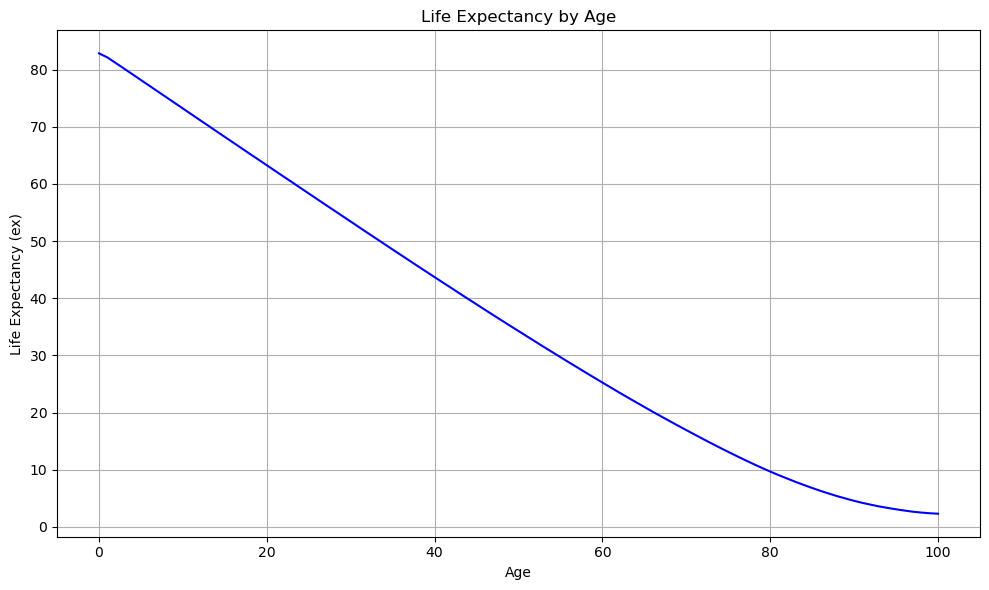

In [21]:
# Step 1: Calculate Central Mortality Rate (mx)
# mx is the central mortality rate at each age.
# It is calculated as the number of deaths divided by the population at that age.
synthetic_life_table["mx"] = synthetic_life_table["Deaths"] / synthetic_life_table["Population"]

# Step 2: Calculate Probability of Dying (qx)
# qx is the probability of dying between age x and x+1.
# For age 0 (infants), we use a simplified formula: qx = mx / (1 + mx)
# For ages 1+, we use the standard approximation: qx = (2 * mx) / (2 + mx)
#
# Note: In official ONS National Life Tables, infant mortality (q0) is calculated using
# grouped deaths under 1 year (<4 weeks, 1–2 months, 3–5 months, etc.) and matched
# monthly birth data to derive a more accurate q0. This method accounts for the uneven
# distribution of infant deaths and uses assumed average ages at death for each group.
# For training purposes, we use a simplified formula here.
synthetic_life_table["qx"] = synthetic_life_table.apply(
    lambda row: row["mx"] / (1 + row["mx"]) if row["Age"] == 0 else (2 * row["mx"]) / (2 + row["mx"]),
    axis=1
)

# Step 3: Calculate Number of Survivors (lx)
# lx is the number of people surviving to exact age x from a starting cohort of 100,000 live births.
# We initialise lx at age 0 and calculate subsequent lx values using qx.
synthetic_life_table["lx"] = 0.0
synthetic_life_table.loc[synthetic_life_table["Age"] == 0, "lx"] = 100000

for i in range(1, len(synthetic_life_table)):
    synthetic_life_table.loc[i, "lx"] = synthetic_life_table.loc[i - 1, "lx"] * (1 - synthetic_life_table.loc[i - 1, "qx"])

# Step 4: Calculate Number of Deaths (dx)
# dx is the number of deaths between age x and x+1.
# It is calculated as dx = lx * qx
synthetic_life_table["dx"] = synthetic_life_table["lx"] * synthetic_life_table["qx"]

# Step 5: Calculate Person-Years Lived (Lx)
# Lx is the number of person-years lived between age x and x+1.
# For most ages: Lx = (lx + lx+1) / 2
# For age 0: L0 = l1 + a0 * d0, where a0 is the average age at death in the first year (assumed 0.1)
# For the final age group: Lx = lx / mx
synthetic_life_table["Lx"] = 0.0
for i in range(len(synthetic_life_table) - 1):
    synthetic_life_table.loc[i, "Lx"] = (synthetic_life_table.loc[i, "lx"] + synthetic_life_table.loc[i + 1, "lx"]) / 2

# Special case for age 0
synthetic_life_table.loc[0, "Lx"] = synthetic_life_table.loc[1, "lx"] + 0.1 * synthetic_life_table.loc[0, "dx"]

# Final age group
last_index = len(synthetic_life_table) - 1
synthetic_life_table.loc[last_index, "Lx"] = synthetic_life_table.loc[last_index, "lx"] / synthetic_life_table.loc[last_index, "mx"]

# Step 6: Calculate Total Person-Years Lived (Tx)
# Tx is the total number of person-years lived from age x onward.
# It is calculated as the cumulative sum of Lx from age x to the final age.
synthetic_life_table["Tx"] = synthetic_life_table["Lx"][::-1].cumsum()[::-1]

# Step 7: Calculate Life Expectancy (ex)
# ex is the life expectancy at exact age x.
# It is calculated as ex = Tx / lx and rounded to 2 decimal places.
synthetic_life_table["ex"] = (synthetic_life_table["Tx"] / synthetic_life_table["lx"]).round(2)

# Step 8: Preview Final Life Table
# This shows the structure and calculated columns of the life table.
scrollable_preview(synthetic_life_table, "Final Life Table")

# Step 9: Visualise Life Expectancy by Age
# This chart shows how life expectancy changes with age.
plt.figure(figsize=(10, 6))
plt.plot(synthetic_life_table["Age"], synthetic_life_table["ex"], color="blue")
plt.title("Life Expectancy by Age")
plt.xlabel("Age")
plt.ylabel("Life Expectancy (ex)")
plt.grid(True)
plt.tight_layout()
plt.show()

## Modelling Expected Deaths and Excess Mortality

This section estimates expected deaths using a **quasi-Poisson regression model** and calculates **excess mortality** using synthetic weekly data.

The model accounts for:
- Seasonal variation across weeks  
- Long-term time trends  
- Demographic and geographic factors  
- Interaction between age and season  
- Population size as an offset

Expected deaths are predicted for **2023 and 2024**, and excess deaths are calculated as the difference between observed and expected values.  
A visualisation compares weekly observed and expected deaths for **England and Wales**, all ages, people.

In [22]:
# Step 1: Format Variables ----
# Convert date fields and categorical variables to appropriate formats for analysis.
# This ensures dates are recognised correctly and categorical variables are treated appropriately in modelling.

deaths_weekly['week_start_date'] = pd.to_datetime(deaths_weekly['week_start_date'])
deaths_weekly['week_end_date'] = pd.to_datetime(deaths_weekly['week_end_date'])

cat_type = CategoricalDtype(ordered=False)
for col in ['age_group', 'sex', 'geography']:
    deaths_weekly[col] = deaths_weekly[col].astype(cat_type)
    population_estimates_weekly[col] = population_estimates_weekly[col].astype(cat_type)

# Step 2: Merge Deaths with Population Estimates ----
# Join the weekly deaths dataset with population estimates.
# This allows each death count to be matched with the relevant population size for modelling.

merged_df = pd.merge(
    deaths_weekly,
    population_estimates_weekly,
    on=['year', 'age_group', 'sex', 'geography'],
    how='left'
)

# Step 3: Create Coarse Age Groups ----
# Coarse age bands are used in seasonal interaction terms to reflect broader mortality patterns.
# These simplify the age structure for seasonal modelling while retaining key age distinctions.

def coarse_age_group(age):
    if age == "All ages":
        return "All ages"
    elif age in ["0-29", "Under 1", "1-4", "5-9", "10-14", "15-19", "20-24", "25-29"]:
        return "Under 30"
    elif age in [
        "30-44", "45-49", "50-54", "55-59", "60-64", "65-69",
        "30-34", "35-39", "40-44"
    ]:
        return "30-69"
    elif age in ["70+", "70-74", "75-79", "80-84", "85-89", "90+"]:
        return "70+"
    else:
        return "Unknown"

merged_df['age_coarse'] = merged_df['age_group'].apply(coarse_age_group)

# Step 4: Prepare Variables for Modelling ----
# Create variables needed for the statistical model:
# - weeknumber: captures seasonal variation across the year
# - timeindex: represents long-term trend across weeks
# - logpop: offset term to adjust for population size in the model

merged_df['weeknumber'] = merged_df['week_start_date'].dt.isocalendar().week.astype(int)
merged_df['timeindex'] = merged_df['week_start_date'].astype('category').cat.codes
merged_df['logpop'] = np.log(merged_df['population'])

# Step 5: Define Model Fitting and Prediction Periods ----
# Fit the model using five years of historical data (2017 to 2022).
# Predict expected deaths for 2023 and 2024 only.

training_data = merged_df[(merged_df['year'] >= 2017) & (merged_df['year'] <= 2022)].copy()
prediction_data = merged_df[merged_df['year'].isin([2023, 2024])].copy()

# Step 6: Fit Quasi-Poisson Regression Model ----
# This model estimates expected deaths using:
# - demographic and geographic variables
# - a linear time trend
# - seasonal effects by week
# - interaction between age and season
# - an offset for population size
# Note: Python's statsmodels does not support quasi-Poisson directly.
# We use Poisson with robust standard errors as an approximation.

formula = (
    'deaths ~ C(age_group) + C(sex) + C(geography) + timeindex + '
    'C(weeknumber) + C(age_coarse):C(weeknumber)'
)

model = sm.GLM.from_formula(
    formula,
    data=training_data,
    family=sm.families.Poisson(),
    offset=training_data['logpop']
)
glm_results = model.fit()

# Step 7: Predict Expected Deaths and Calculate Excess Deaths ----
# Use the fitted model to estimate expected deaths for 2023 and 2024.
# Excess deaths are calculated as: observed deaths minus expected deaths.

prediction_data['expected_deaths'] = glm_results.predict(prediction_data, offset=prediction_data['logpop'])
prediction_data['excess_deaths'] = prediction_data['deaths'] - prediction_data['expected_deaths']

# Step 8: Aggregate Weekly Totals ----
# Summarise observed, expected, and excess deaths by week, geography, age group, and sex.
# This prepares the data for visualisation and reporting.

group_cols = ['year', 'week_end_date', 'geography', 'age_group', 'sex']
required_columns = group_cols + ['deaths', 'expected_deaths', 'excess_deaths']

# Drop rows with missing values in any required column
prediction_data = prediction_data.dropna(subset=required_columns)

# Perform aggregation with full breakdown
weekly_summary = (
    prediction_data
    .groupby(group_cols, as_index=False, observed=True)[['deaths', 'expected_deaths', 'excess_deaths']]
    .sum()
    .rename(columns={
        'deaths': 'observed',
        'expected_deaths': 'expected',
        'excess_deaths': 'excess'
    })
)

# Step 9: Filter for England and Wales, All Ages, People ----
# This subset is used for visualisation and reporting.
# It focuses on total deaths across all ages and sexes for England and Wales.

EW_weekly_summary_recent = weekly_summary[
    (weekly_summary['geography'] == 'England and Wales') &
    (weekly_summary['age_group'] == 'All ages') &
    (weekly_summary['sex'] == 'people')
].copy()

In [23]:
def scrollable_preview(df, title="Data Preview"):
    # Sort the DataFrame by week_end_date, geography, age_group, and sex
    df_sorted = df.sort_values(['week_end_date', 'geography', 'age_group', 'sex'])

    # Create a copy for display with rounded values
    df_display = df_sorted.copy()
    if 'expected_deaths' in df_display.columns:
        df_display['expected_deaths'] = df_display['expected_deaths'].round(0)
    if 'excess_deaths' in df_display.columns:
        df_display['excess_deaths'] = df_display['excess_deaths'].round(0)

    html = f"""
    <h3>{title}</h3>
    <div style="max-height: 400px; overflow-y: scroll; border: 1px solid #ccc; padding: 10px;">
        {df_display.to_html(index=False)}
    </div>
    """
    display(HTML(html))

# Call the preview with updated title
scrollable_preview(prediction_data, "Weekly Deaths Model Output (England and Wales, All Ages, People)")

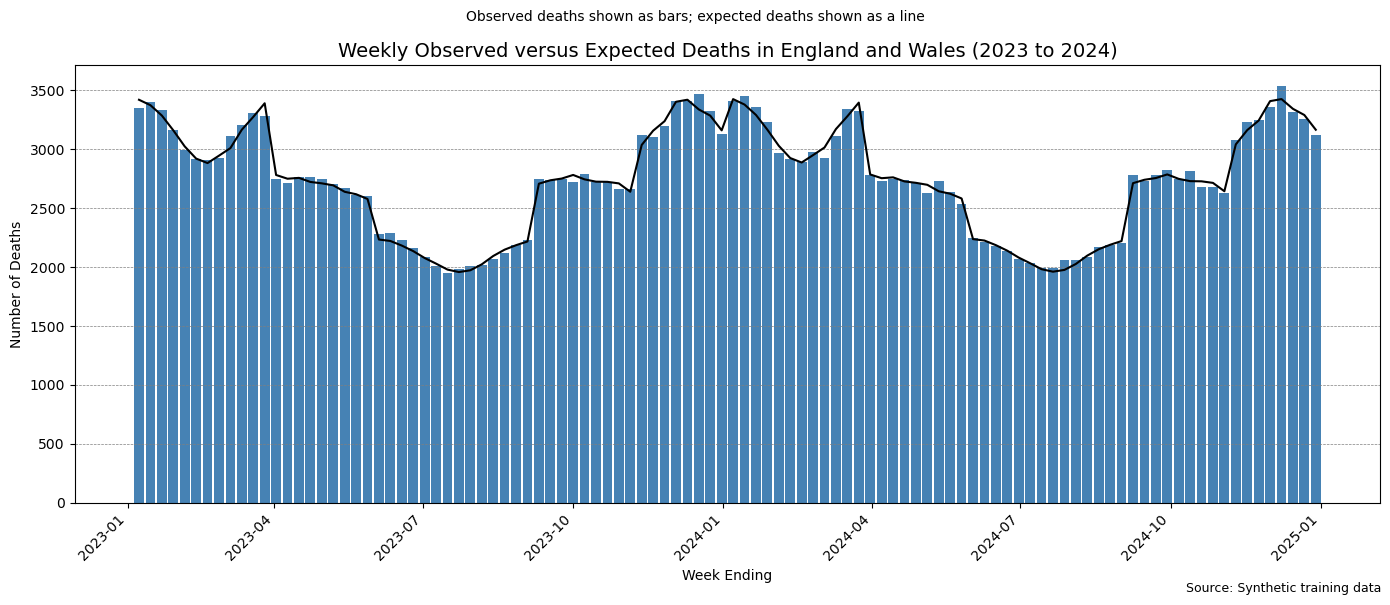

In [24]:
# Ensure week_end_date is datetime
EW_weekly_summary_recent['week_end_date'] = pd.to_datetime(EW_weekly_summary_recent['week_end_date'])

# Sort by date
EW_weekly_summary_recent = EW_weekly_summary_recent.sort_values('week_end_date')

# Create the plot
plt.figure(figsize=(14, 6))

# Plot observed deaths as blue bars
plt.bar(
    EW_weekly_summary_recent['week_end_date'],
    EW_weekly_summary_recent['observed'],
    color='steelblue',
    label='Observed Deaths',
    width=6
)

# Plot expected deaths as black line
plt.plot(
    EW_weekly_summary_recent['week_end_date'],
    EW_weekly_summary_recent['expected'],
    color='black',
    linewidth=1.5,
    label='Expected Deaths'
)

# Add labels and title
plt.title('Weekly Observed versus Expected Deaths in England and Wales (2023 to 2024)', fontsize=14)
plt.suptitle('Observed deaths shown as bars; expected deaths shown as a line', fontsize=10)
plt.xlabel('Week Ending')
plt.ylabel('Number of Deaths')
plt.figtext(0.99, 0.01, 'Source: Synthetic training data', horizontalalignment='right', fontsize=9)

# Customize x-axis
plt.xticks(rotation=45, ha='right')

# Customize grid
plt.grid(axis='y', color='grey', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Show the plot
plt.show()